In [131]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [133]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [134]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [135]:
predicted_graph1 = pc_chen(partial_corr_test, ts, 4, 0.05)
predicted_graph2 = pc_chen_modified(partial_corr_test, ts, 4, 0.05)

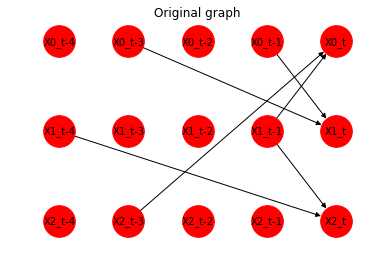

In [136]:
plt.title('Original graph')
generator.draw_graph()

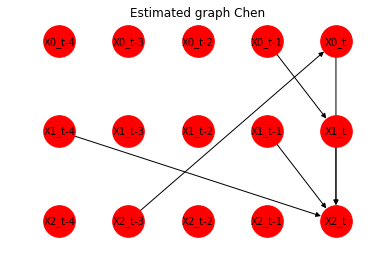

In [137]:
plt.title("Estimated graph Chen")
draw_graph(predicted_graph1, dimensions, max_p)

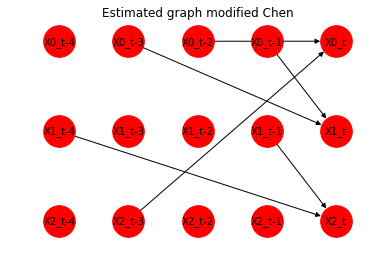

In [138]:
plt.title("Estimated graph modified Chen")
draw_graph(predicted_graph2, dimensions, max_p)

In [143]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph1), index=[0])

,accuracy,f1-score,matthews_corrcoef
0,0.980952,0.666667,0.656863


In [144]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph2), index=[0])

,accuracy,f1-score,matthews_corrcoef
0,0.990476,0.833333,0.828431


In [147]:
p_ranking, ic_scores = var_order_select(ts, max_p=10, drop=False)

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [148]:
pd.DataFrame(p_ranking)

,aic,bic,fpe,hqic
0,4,4,4,4
1,3,3,3,3
2,9,9,9,9
3,5,5,5,5
4,6,6,6,6
5,10,10,10,10
6,7,7,7,7
7,8,8,8,8
8,2,2,2,2
9,1,1,1,1


In [149]:
pd.DataFrame(ic_scores)

,aic,bic,fpe,hqic
0,-72.061389,-72.033245,5.050715e-32,-72.051862
1,-36.684702,-36.663052,1.167140e-16,-36.677373
2,-30.193569,-30.132950,7.708481e-14,-30.173049
3,-28.865650,-28.831011,2.905056e-13,-28.853924
4,-25.773228,-25.732093,6.401870e-12,-25.759303
5,-17.837796,-17.770682,1.791198e-08,-17.815077
6,-17.031065,-16.983436,4.009686e-08,-17.014942
7,-15.084723,-15.030599,2.808837e-07,-15.066401
8,0.549528,0.564683,1.728277e+00,0.554658
9,1.317632,1.326292,3.724489e+00,1.320564
